The Wine Quality dataset was chosen because it contains multiple features with real-world significance. Predicting wine quality from chemical properties demonstrates practical applications of classification algorithms and allows us to explore data preprocessing, modeling, and interpretability techniques, which are critical skills in machine learning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

In [4]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
#print(wine_quality.metadata)

In [5]:
df = pd.concat([X, y], axis=1)
print(df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

EDA basic summary 🍇

No missing values
All features are numeric
1599 samples, 11 features + target

In [6]:
print(df.shape)
print(df.info())
print(df.describe())


(6497, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000 

In [7]:
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Target Distribution 🍇

Class imbalances exists which is addressed in modeling.

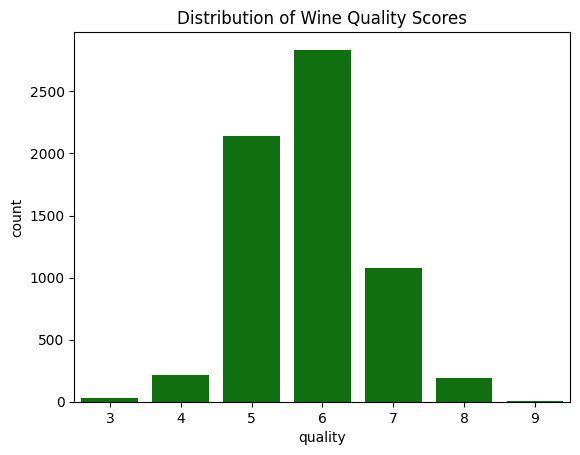

In [8]:
sns.countplot(x='quality', data=df, color='green' )
plt.title("Distribution of Wine Quality Scores")
plt.show()

Key correlations:

Alcohol positively correlates with quality

Volatile acidity negatively correlates

Density slightly negatively correlates

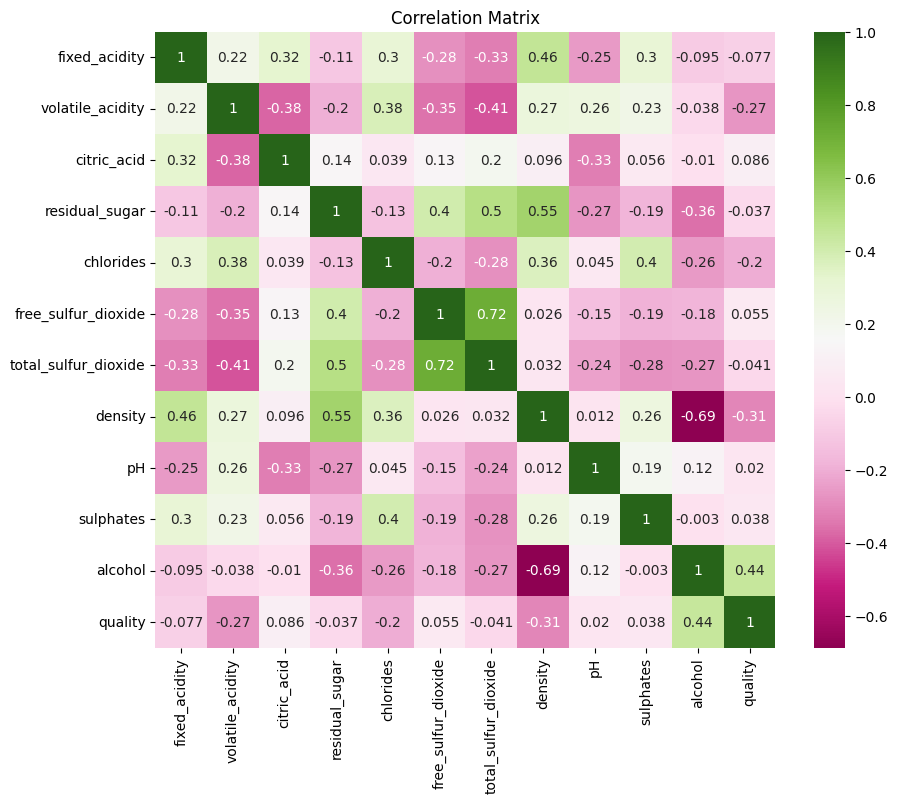

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.title("Correlation Matrix")
plt.show()

Reprocessing 🍇

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    f1_score
)

In [11]:
# Good wine and bad wine
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Features and target
X_data = df.drop(['quality', 'quality_binary'], axis=1)
y_data = df['quality_binary']

Model Implementation 🍇

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train) # Fit with scaled data

y_pred = model.predict(X_test_scaled) # Predict with scaled data

Logistic Regression 🍇

In [13]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:,1]

Random Forest 🌲

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:,1]

Gradient Boosting 🍇

In [15]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)
gb_probs = gb_model.predict_proba(X_test)[:,1]

Model Comparison 🍇

In [16]:
print("===Logistic Regression===")
print("accuracy: ", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

print("===Random Forest===")
print("accuracy: ", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("===Gradient Boosting===")
print("accuracy: ", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))

===Logistic Regression===
accuracy:  0.7238461538461538
              precision    recall  f1-score   support

           0       0.61      0.58      0.59       451
           1       0.78      0.80      0.79       849

    accuracy                           0.72      1300
   macro avg       0.69      0.69      0.69      1300
weighted avg       0.72      0.72      0.72      1300

===Random Forest===
accuracy:  0.8253846153846154
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       451
           1       0.87      0.86      0.87       849

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300

===Gradient Boosting===
accuracy:  0.7592307692307693
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       451
           1       0.81      0.83      0.82       849

    accuracy          

Confusion Matrix Visulas 📜

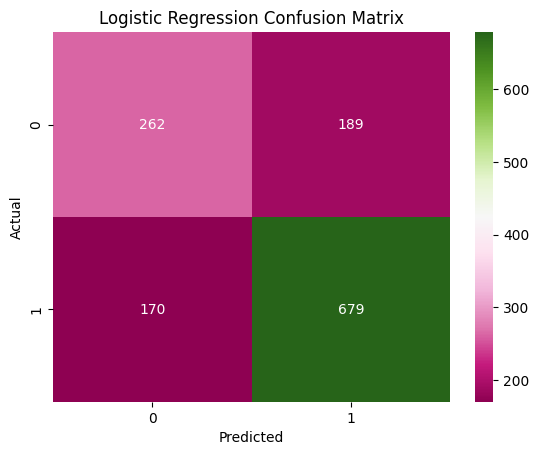

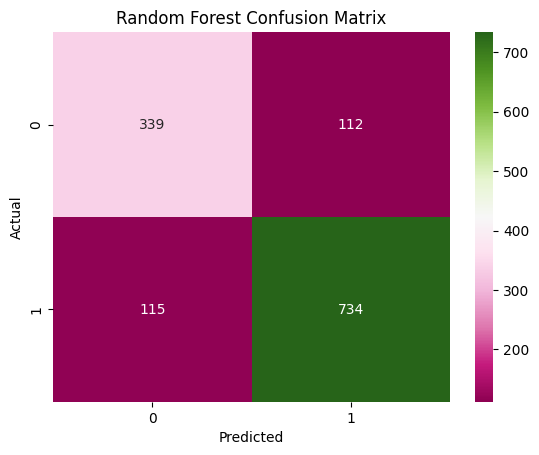

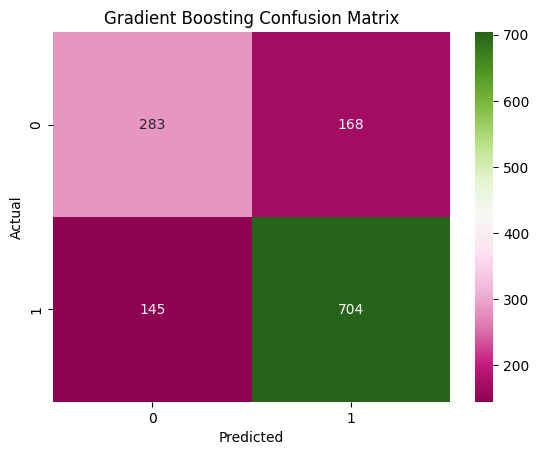

In [17]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, log_preds, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, gb_preds, "Gradient Boosting Confusion Matrix")


Score Comparison of all 3

In [18]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

accuracy = [
    accuracy_score(y_test, log_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, gb_preds)
]

f1 = [
    f1_score(y_test, log_preds),
    f1_score(y_test, rf_preds),
    f1_score(y_test, gb_preds)
]

auc = [
    roc_auc_score(y_test, log_probs),
    roc_auc_score(y_test, rf_probs),
    roc_auc_score(y_test, gb_probs)
]

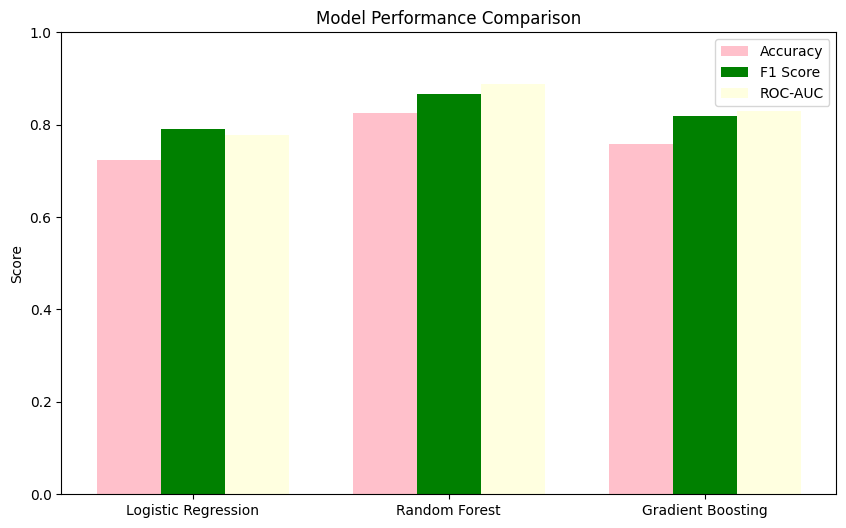

In [19]:
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, accuracy, width, label='Accuracy', color = 'pink')
plt.bar(x, f1, width, label='F1 Score', color = 'green')
plt.bar(x + width, auc, width, label='ROC-AUC', color ="lightyellow")

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()

plt.show()

Feature Importance(Random Forest) 🌳

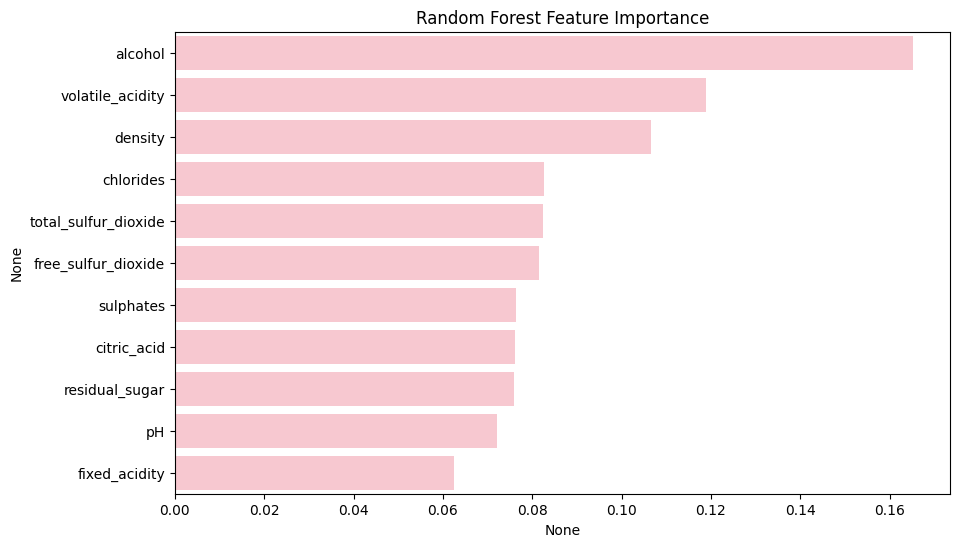

In [20]:
importances = rf_model.feature_importances_
feature_names = X_data.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, color='pink')
plt.title("Random Forest Feature Importance")
plt.show()

Random Forest perfromed the highest accuracy(0.825) and F1-score (0.87), outperforming Gradient Boosting (accuracy 0.759, F1 0.82) and Logistic Regression (accuracy 0.724, F1 0.79). This indicates that the relationships between chemical features and wine quality are nonlinear, which tree-based ensemble methods capture effectively.

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.